# GLOBAL_POWER_PLANT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df1=pd.read_csv('power plant(AUS)')
df2=pd.read_csv('power plant(IND)')
df3=pd.read_csv('power plant(USA)')

In [3]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   512 non-null    object 
 1   country_long              512 non-null    object 
 2   name                      512 non-null    object 
 3   gppd_idnr                 512 non-null    object 
 4   capacity_mw               506 non-null    float64
 5   latitude                  512 non-null    float64
 6   longitude                 512 non-null    float64
 7   primary_fuel              512 non-null    object 
 8   other_fuel1               0 non-null      float64
 9   other_fuel2               0 non-null      float64
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        292 non-null    float64
 12  owner                     495 non-null    object 
 13  source                    512 non-null    object 
 14  url       

In [5]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   6
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 512
other_fuel2                 512
other_fuel3                 512
commissioning_year          220
owner                        17
source                        0
url                           0
geolocation_source            0
wepp_id                     512
year_of_capacity_data         4
generation_gwh_2013         259
generation_gwh_2014         235
generation_gwh_2015         222
generation_gwh_2016         213
generation_gwh_2017         219
generation_gwh_2018         212
generation_gwh_2019         512
generation_data_source      200
estimated_generation_gwh    512
dtype: int64

In [6]:
df1.describe()

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,506.000000,512.000000,512.000000,0.0,0.0,0.0,292.000000,0.0,508.0,253.000000,277.000000,290.000000,299.000000,293.000000,300.000000,0.0,0.0
mean,127.380881,-30.862719,138.913013,NaN,NaN,NaN,1997.931507,NaN,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,NaN
std,291.227666,7.238762,12.820301,NaN,NaN,NaN,16.217659,NaN,0.0,2251.906541,2068.549403,2206.550948,2201.084181,2228.929378,2239.435401,NaN,NaN
min,0.010000,-42.888300,113.534000,NaN,NaN,NaN,1949.000000,NaN,2019.0,0.003333,0.005000,0.000000,0.001667,0.021944,0.005000,NaN,NaN
25%,3.225000,-36.323000,129.337475,NaN,NaN,NaN,1989.000000,NaN,2019.0,17.232778,17.976667,14.980417,14.313889,13.282222,14.430486,NaN,NaN
50%,30.000000,-32.948800,144.967400,NaN,NaN,NaN,2001.000000,NaN,2019.0,100.758889,107.352500,93.063333,92.104722,89.629600,82.502639,NaN,NaN
75%,110.750000,-25.513875,148.595875,NaN,NaN,NaN,2012.000000,NaN,2019.0,325.435278,357.544444,325.640278,306.663889,354.642778,318.735278,NaN,NaN
max,2640.000000,-12.188900,153.434100,NaN,NaN,NaN,2018.000000,NaN,2019.0,16593.380000,16099.330280,17090.680000,17914.930000,15944.580000,17186.143890,NaN,NaN


In [7]:
df1.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2019','gppd_idnr',
          'year_of_capacity_data','owner'],axis=1,inplace=True)


In [8]:
df1.fillna(df1.median()[0], inplace=True)

In [9]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [10]:
df2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
df2.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [13]:
df2.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2019','gppd_idnr',
          'year_of_capacity_data','owner'],axis=1,inplace=True)


In [14]:
df2.fillna(df2.median()[0], inplace=True)

In [15]:
df2.isnull().sum()

country                   0
country_long              0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [16]:
df3.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   11879 non-null  object 
 1   country_long              11879 non-null  object 
 2   name                      11879 non-null  object 
 3   gppd_idnr                 11879 non-null  object 
 4   capacity_mw               11879 non-null  float64
 5   latitude                  11847 non-null  float64
 6   longitude                 11847 non-null  float64
 7   primary_fuel              9875 non-null   object 
 8   other_fuel1               1430 non-null   object 
 9   other_fuel2               269 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        9829 non-null   float64
 12  owner                     11866 non-null  object 
 13  source                    11879 non-null  object 
 14  url   

In [18]:
df3.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                       32
longitude                      32
primary_fuel                 2004
other_fuel1                 10449
other_fuel2                 11610
other_fuel3                 11787
commissioning_year           2050
owner                          13
source                          0
url                             0
geolocation_source              4
wepp_id                     11879
year_of_capacity_data          46
generation_gwh_2013          5408
generation_gwh_2014          5026
generation_gwh_2015          4604
generation_gwh_2016          3917
generation_gwh_2017          3326
generation_gwh_2018          2774
generation_gwh_2019          2102
generation_data_source       1810
estimated_generation_gwh    11879
dtype: int64

In [19]:
df3.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2019','gppd_idnr',
          'year_of_capacity_data','owner'],axis=1,inplace=True)


In [20]:
df3['primary_fuel']=df3['primary_fuel'].fillna(df3['primary_fuel'].mode()[0])

In [21]:
df3.fillna(df3.median()[0], inplace=True)

In [22]:
df3.isnull().sum()

country                   0
country_long              0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [23]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [24]:
df

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,AUS,Australia,Adelaide Airport,0.11,-34.9387,138.5377,Solar,2011.00000,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
1,AUS,Australia,Adelaide Showgrounds,1.00,-34.9453,138.5882,Solar,30.00000,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
2,AUS,Australia,Albany Wind Farm,21.60,-35.0641,117.7977,Wind,30.00000,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,0.24,-23.7966,133.8971,Solar,2004.00000,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
4,AUS,Australia,Amcor Gawler,4.00,-34.5509,138.7659,Oil,2015.00000,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,3.40,42.8869,-76.9683,Wind,2012.00000,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,U.S. Energy Information Administration
13294,USA,United States of America,Zumbro Community Solar Garden,1.00,44.3195,-92.6703,Solar,2018.00000,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.000000,5.000000,5.000000,5.000000,5.000000,1.161000,U.S. Energy Information Administration
13295,USA,United States of America,Zumbro Solar Garden,0.00,44.0460,-92.7600,Solar,5.00000,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
13296,USA,United States of America,Zuni,0.00,39.7373,-105.0170,Solar,5.00000,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,U.S. Energy Information Administration


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   capacity_mw             13298 non-null  float64
 4   latitude                13298 non-null  float64
 5   longitude               13298 non-null  float64
 6   primary_fuel            13298 non-null  object 
 7   commissioning_year      13298 non-null  float64
 8   source                  13298 non-null  object 
 9   url                     13298 non-null  object 
 10  geolocation_source      13298 non-null  object 
 11  generation_gwh_2013     13298 non-null  float64
 12  generation_gwh_2014     13298 non-null  float64
 13  generation_gwh_2015     13298 non-null  float64
 14  generation_gwh_2016     13298 non-null

In [26]:
df.isnull().sum()

country                   0
country_long              0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [27]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000
mean,117.699129,35.064421,-73.144559,1603.824091,308.434268,364.838377,375.104091,371.612905,375.862950,384.340092
std,347.095704,15.534302,63.285169,791.993137,1516.266715,1679.582434,1691.652956,1679.071876,1689.926784,1704.678608
min,0.000000,-42.888300,-171.712400,5.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.890675,-104.583400,1954.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.088500
50%,5.500000,38.397900,-87.104400,2000.295163,5.000000,5.000000,5.000000,5.000000,5.025500,6.285000
75%,52.650000,42.190675,-75.291600,2014.000000,46.912750,59.200000,59.200000,59.200000,59.200000,59.200000
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


In [28]:
print(df['country'].unique())
print(df['country_long'].unique())

['AUS' 'IND' 'USA']
['Australia' 'India' 'United States of America']


In [29]:
df.drop(['country_long'],axis=1,inplace=True)

In [30]:
df['name'].unique()

array(['Adelaide Airport', 'Adelaide Showgrounds', 'Albany Wind Farm',
       ..., 'Zumbro Solar Garden', 'Zuni', 'eBay - South Jordan'],
      dtype=object)

In [31]:
df['source'].nunique()

206

In [32]:
df['url'].nunique()

325

In [33]:
print(df1['generation_data_source'].unique())
print(df2['generation_data_source'].unique())
print(df3['generation_data_source'].unique())

[30.0 'Australia Clean Energy Regulator']
[59.2 'Central Electricity Authority']
[5.0 'U.S. Energy Information Administration']


In [34]:
df.drop(['generation_data_source'],axis=1,inplace=True)

In [35]:
df['geolocation_source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure',
       'National Renewable Energy Laboratory', 'WRI', 59.2,
       'Industry About', 'U.S. Energy Information Administration', 5.0],
      dtype=object)

In [36]:
df['geolocation_source'].value_counts()

U.S. Energy Information Administration                11833
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
59.2                                                     19
National Renewable Energy Laboratory                      4
5.0                                                       4
Name: geolocation_source, dtype: int64

In [37]:
df['geolocation_source'] = df['geolocation_source'].replace(5.0, np.nan)

In [38]:
df['geolocation_source'] = df['geolocation_source'].replace(59.2, np.nan)

In [39]:
df=df.dropna(axis=0)

In [40]:
df.drop(['url'],axis=1,inplace=True)

<Axes: >

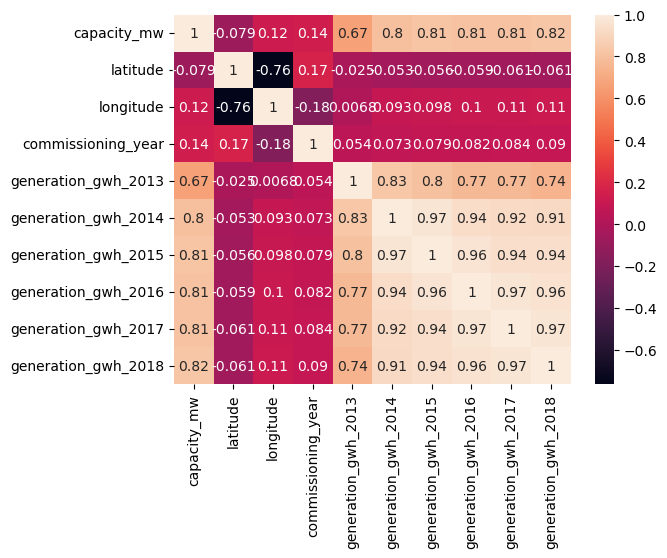

In [41]:
sns.heatmap(df.corr(),annot=True)

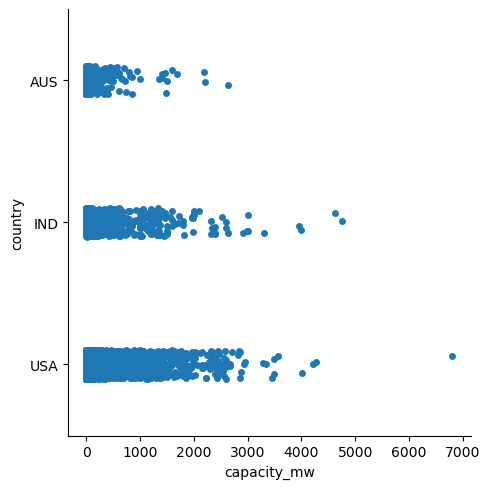

In [43]:
sns.catplot(data=df,x='capacity_mw',y='country')

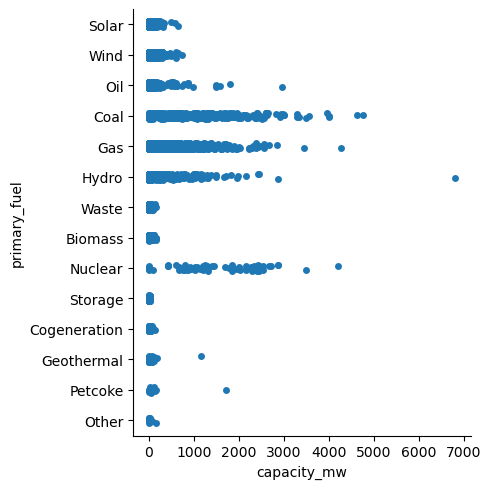

In [44]:
sns.catplot(data=df,x='capacity_mw',y='primary_fuel')

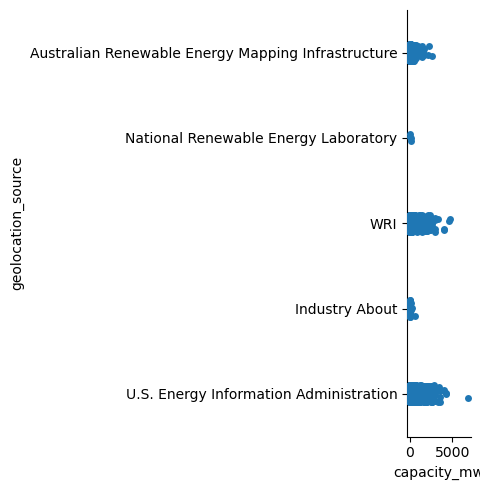

In [47]:
sns.catplot(data=df,x='capacity_mw',y='geolocation_source')

In [48]:
lb = LabelEncoder()
df['country']=lb.fit_transform(df['country'])
df['name']=lb.fit_transform(df['name'])
df['primary_fuel'] = lb.fit_transform(df['primary_fuel'])
df['geolocation_source'] = lb.fit_transform(df['geolocation_source'])
df['source'] = lb.fit_transform(df['source'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'country'),
  Text(2, 0, 'name'),
  Text(3, 0, 'capacity_mw'),
  Text(4, 0, 'latitude'),
  Text(5, 0, 'longitude'),
  Text(6, 0, 'primary_fuel'),
  Text(7, 0, 'commissioning_year'),
  Text(8, 0, 'source'),
  Text(9, 0, 'geolocation_source'),
  Text(10, 0, 'generation_gwh_2013'),
  Text(11, 0, 'generation_gwh_2014'),
  Text(12, 0, 'generation_gwh_2015'),
  Text(13, 0, 'generation_gwh_2016'),
  Text(14, 0, 'generation_gwh_2017'),
  Text(15, 0, 'generation_gwh_2018')])

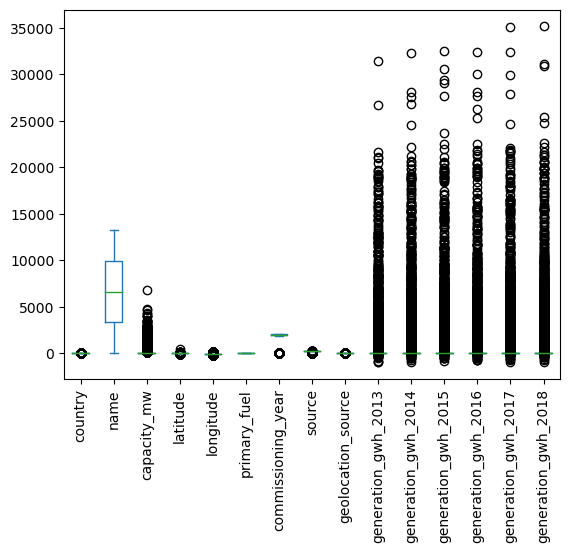

In [49]:
df.plot.box()
plt.xticks(rotation='vertical')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13275 entries, 0 to 13297
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13275 non-null  int32  
 1   name                 13275 non-null  int32  
 2   capacity_mw          13275 non-null  float64
 3   latitude             13275 non-null  float64
 4   longitude            13275 non-null  float64
 5   primary_fuel         13275 non-null  int32  
 6   commissioning_year   13275 non-null  float64
 7   source               13275 non-null  int32  
 8   geolocation_source   13275 non-null  int32  
 9   generation_gwh_2013  13275 non-null  float64
 10  generation_gwh_2014  13275 non-null  float64
 11  generation_gwh_2015  13275 non-null  float64
 12  generation_gwh_2016  13275 non-null  float64
 13  generation_gwh_2017  13275 non-null  float64
 14  generation_gwh_2018  13275 non-null  float64
dtypes: float64(10), int32(5)
memory usag

# Removing outliers

In [50]:
z=np.abs(zscore(df).values)

In [51]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 13223, 13237, 13242], dtype=int64), array([0, 3, 4, ..., 7, 4, 2], dtype=int64))


In [52]:
DF=df[(z<3).all(axis=1)]

In [53]:
print(df.shape)
print(DF.shape)

(13275, 15)
(12161, 15)


In [62]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12161 entries, 512 to 13297
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              12161 non-null  int32  
 1   name                 12161 non-null  int32  
 2   capacity_mw          12161 non-null  float64
 3   latitude             12161 non-null  float64
 4   longitude            12161 non-null  float64
 5   primary_fuel         12161 non-null  int32  
 6   commissioning_year   12161 non-null  float64
 7   source               12161 non-null  int32  
 8   geolocation_source   12161 non-null  int32  
 9   generation_gwh_2013  12161 non-null  float64
 10  generation_gwh_2014  12161 non-null  float64
 11  generation_gwh_2015  12161 non-null  float64
 12  generation_gwh_2016  12161 non-null  float64
 13  generation_gwh_2017  12161 non-null  float64
 14  generation_gwh_2018  12161 non-null  float64
dtypes: float64(10), int32(5)
memory us

# skewness

In [58]:
DF.skew()

country               -4.037441
name                   0.003128
capacity_mw            3.680306
latitude              -0.712023
longitude              2.759399
primary_fuel          -0.500232
commissioning_year    -1.622520
source                -4.569347
geolocation_source    -1.409493
generation_gwh_2013    6.123300
generation_gwh_2014    5.704118
generation_gwh_2015    5.704496
generation_gwh_2016    5.816739
generation_gwh_2017    5.700408
generation_gwh_2018    5.579797
dtype: float64

In [59]:
from sklearn.preprocessing import power_transform

In [64]:
DF[['country','capacity_mw','source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
    'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(DF[['country','capacity_mw',
    'source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
    'generation_gwh_2017','generation_gwh_2018']])

In [66]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

# scaling data

In [67]:
mmc=MinMaxScaler()
x=mmc.fit_transform(x)

In [68]:
best_random_state = 0
best_score = 0

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(xtrain, ytrain)
    score = lr.score(xtest, ytest)
    
    if score > best_score:
        best_score = score
        best_random_state = i

print('Best random state:', best_random_state)
print('Best score:', best_score)

Best random state: 24
Best score: 0.7809181554948578


In [69]:
pred=lr.predict(xtest)
print('MSE:',mean_squared_error(pred,ytest))
print('MAE:',mean_absolute_error(pred,ytest))
print('r2_score:',r2_score(pred,ytest))

MSE: 40120.294643467016
MAE: 88.65577418007322
r2_score: 0.6314758489634498


In [70]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
predic=dtc.predict(xtest)

In [71]:
print('MSE:',mean_squared_error(pred,ytest))
print('MAE:',mean_absolute_error(pred,ytest))
print('r2_score:',r2_score(pred,ytest))

MSE: 40120.294643467016
MAE: 88.65577418007322
r2_score: 0.6314758489634498


In [72]:
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
gbr_pred=gbr.predict(xtest)

In [73]:
print('MSE:',mean_squared_error(gbr_pred,ytest))
print('MAE:',mean_absolute_error(gbr_pred,ytest))
print('r2_score:',r2_score(gbr_pred,ytest))

MSE: 23411.18117410109
MAE: 57.39478457078016
r2_score: 0.7891924184934651


In [74]:
rd=Ridge('alpha'==0.1)
rd.fit(xtrain,ytrain)
pre=rd.predict(xtest)

In [75]:
print('MSE:',mean_squared_error(pre,ytest))
print('MAE:',mean_absolute_error(pre,ytest))
print('r2_score:',r2_score(pre,ytest))

MSE: 40120.294643468515
MAE: 88.6557741800733
r2_score: 0.6314758489634384


In [76]:
rf=RandomForestRegressor()
                          
rf.fit(xtrain,ytrain)
predi=rf.predict(xtest)


In [77]:
print('MSE:',mean_squared_error(predi,ytest))
print('MAE:',mean_absolute_error(predi,ytest))
print('r2_score:',r2_score(predi,ytest))

MSE: 20761.888259841686
MAE: 49.55703319020715
r2_score: 0.8161850593386871


# Hyperparameter tuning

In [78]:
rf=RandomForestRegressor()
param={'max_depth':[10,20,30],'n_estimators':[100,150]}
rf=GridSearchCV(rf,param,cv=5)
rf.fit(xtrain,ytrain)
rf.best_params_

{'max_depth': 20, 'n_estimators': 150}

In [79]:
rf=RandomForestRegressor(max_depth=20,n_estimators=150)
                          
rf.fit(xtrain,ytrain)
pred_i=rf.predict(xtest)

In [80]:
print('MSE:',mean_squared_error(pred_i,ytest))
print('MAE:',mean_absolute_error(pred_i,ytest))
print('r2_score:',r2_score(pred_i,ytest))

MSE: 20614.473755121177
MAE: 49.770606907095285
r2_score: 0.8180219663455397


# predicting primary fuel (classification)

In [82]:
X=df.drop(['primary_fuel'],axis=1)
Y=df['primary_fuel']

In [83]:
mmc=MinMaxScaler()
X=mmc.fit_transform(X)

In [84]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.2,random_state=42)

In [85]:
DTC= DecisionTreeClassifier()
RC= RandomForestClassifier()
SC=SVC()

model=[DTC,RC,SC]



for m in model:
    m.fit(Xtrain,Ytrain)
    m.score(Xtrain,Ytrain)
    prediction=m.predict(Xtest)
    
    print('Accuracy score :', m)
    print(accuracy_score(Ytest,prediction))   
        

Accuracy score : DecisionTreeClassifier()
0.7548022598870057
Accuracy score : RandomForestClassifier()
0.8331450094161958
Accuracy score : SVC()
0.488135593220339


In [86]:
RC=RandomForestClassifier()
                          
RC.fit(Xtrain,Ytrain)
PRED=RC.predict(Xtest)

In [87]:
print(accuracy_score(Ytest,PRED))

0.8365348399246705


In [90]:
import joblib
joblib.dump(RC,'Global power plant.obj')

['Global power plant.obj']